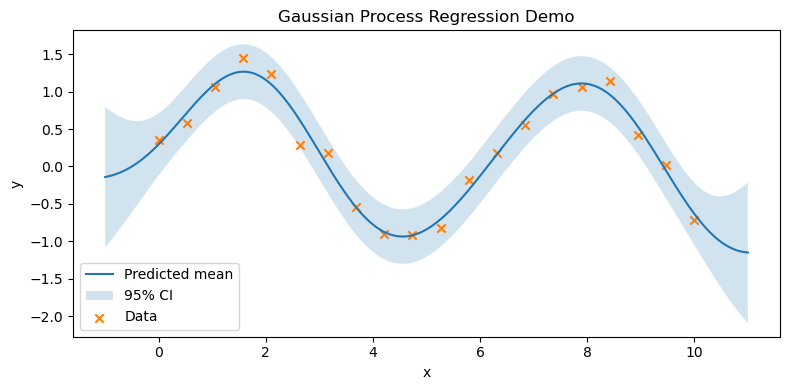

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel

# Create training data: noisy sine curve
rng = np.random.RandomState(0)
X_train = np.linspace(0, 10, 20).reshape(-1, 1)
y_train = np.sin(X_train).ravel() + rng.normal(scale=0.2, size=X_train.shape[0])

# Define a kernel: output scale * RBF length-scale + WhiteKernel noise
kernel = ConstantKernel(1.0, (1e-3, 1e3)) * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e3)) + WhiteKernel(noise_level=0.1, noise_level_bounds=(1e-5, 1e1))

# Fit the Gaussian Process model (optimises hyperparameters internally)
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, random_state=0)
gpr.fit(X_train, y_train)

# Generate predictions over a dense grid
X_pred = np.linspace(-1, 11, 400).reshape(-1, 1)
y_mean, y_std = gpr.predict(X_pred, return_std=True)

# Plot the mean and 95 % confidence interval
plt.figure(figsize=(8,4))
plt.plot(X_pred, y_mean, label="Predicted mean")
plt.fill_between(X_pred.ravel(),
                 y_mean - 1.96 * y_std,
                 y_mean + 1.96 * y_std,
                 alpha=0.2, label="95% CI")
plt.scatter(X_train, y_train, marker='x', color='tab:orange', label="Data")
plt.title("Gaussian Process Regression Demo")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.tight_layout()
plt.show()